# **LOADING THE DATASET**

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/kaggle/input/oil-reserve-in-mm-stb/OIL RESERVE IN MM STB.csv')

In [3]:
df.head()

,A,h,phi,Swi,Rf,Bo,Np(In MM STB)
0,52,35,0.105517,0.433784,0.751064,80,0.007920
1,93,75,0.243215,0.039028,0.849330,3,3.580554
2,15,87,0.779881,0.063515,0.773912,89,0.064297
3,72,30,0.463686,0.191548,0.127838,76,0.010566
4,61,48,0.457068,0.718298,0.759110,98,0.022655


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   A              50000 non-null  int64  
 1   h              50000 non-null  int64  
 2   phi            50000 non-null  float64
 3   Swi            50000 non-null  float64
 4   Rf             50000 non-null  float64
 5   Bo             50000 non-null  int64  
 6   Np(In MM STB)  50000 non-null  float64
dtypes: float64(4), int64(3)
memory usage: 2.7 MB


**IMPORTING NECESSARY LIBRARIES**

In [5]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer

In [6]:
 from sklearn.model_selection import KFold
 from sklearn.model_selection import cross_val_score
 from sklearn.model_selection import GridSearchCV
 from sklearn.linear_model import LinearRegression
 from sklearn.linear_model import Lasso
 from sklearn.linear_model import ElasticNet
 from sklearn.tree import DecisionTreeRegressor
 from sklearn.neighbors import KNeighborsRegressor
 from sklearn.svm import SVR
 from sklearn.pipeline import Pipeline
 from sklearn.ensemble import RandomForestRegressor
 from sklearn.ensemble import GradientBoostingRegressor
 from sklearn.ensemble import ExtraTreesRegressor
 from sklearn.ensemble import AdaBoostRegressor
 from sklearn.metrics import mean_squared_error

In [7]:
import matplotlib.pyplot as plt

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

**SPLITTING DATASET**

In [10]:
array=df.values
X=array[:,0:6]
Y=array[:,6]

validation_size =0.20
randomseed=7
xtrain,xval,ytrain,yval=train_test_split(X,Y,test_size=validation_size,random_state=randomseed)



**FEATURE SCALING** - STANDARDIZATION

In [11]:
scaler = StandardScaler()
#scaler = MinMaxScaler()
#scaler = Normalizer()
X_train_std = scaler.fit_transform(xtrain)
X_val_std = scaler.transform(xval)

# TESTING ALGORITHMS AND ENSEMBLE METHODS

In [12]:
 num_folds = 10
 seed = 7
 scoring = 'neg_mean_squared_error'

**LINEAR ALGORITHMS -**
  Linear regression,
  LASSO  regression,
  ElasticNet


In [13]:
models_linear=[]
models_linear.append(('LR', LinearRegression()))
models_linear.append(('LASSO', Lasso()))
models_linear.append(('EN', ElasticNet()))

**KFold Cross-Validation** is being used to estimate the performance of algorithms in this case.  It works by splitting the dataset into k-part.  Each split of the data is called a fold. The  algorithm is trained on k − 1 folds with one held back and tested on the held back fold After
 running cross-validation you end up with k different performance scores that you can summariz
 using a mean and a standard deviatio The result is a more reliable estimate of the performance of the algorithm on new data. It is
 more accurate because the algorithm is trained and evaluated multiple times on different data Performance Metrics used in this case is **Mean Squared Error**..n.. 

In [14]:
 results_linear = []
 names_linear = []
 for name, model in models_linear:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train_std, ytrain, cv=kfold, scoring=scoring)
  results_linear.append(cv_results)
  names_linear.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

LR: -0.405539 (0.235814)
LASSO: -0.455416 (0.242632)
EN: -0.455416 (0.242632)


**NON-LINEAR ALGORITHMS -**
  KNeighbors Regressor,
  Decision Tree Regressor
  


In [15]:
 models_nonlinear = []
 models_nonlinear.append(('KNN', KNeighborsRegressor()))
 models_nonlinear.append(('CART', DecisionTreeRegressor()))
 

In [16]:
 results_nonlinear = []
 names_nonlinear = []
 for name, model in models_nonlinear:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train_std, ytrain, cv=kfold, scoring=scoring)
  results_nonlinear.append(cv_results)
  names_nonlinear.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

KNN: -0.224254 (0.168284)
CART: -0.213853 (0.100197)


**ENSEMBLE METHODS -**
  AdaBoost Regressor,
  Gradient Boosting Regressor, Random Forest Regressor , Extra Trees Regressor

In [17]:
 ensembles = []
 ensembles.append(('AB',
 AdaBoostRegressor()))
 ensembles.append(('GBM',
 GradientBoostingRegressor()))
 ensembles.append(('RF',
 RandomForestRegressor(n_estimators=10)))
 ensembles.append(('ET',
 ExtraTreesRegressor(n_estimators=10)))


In [18]:
 ensemble_results = []
 ensemble_names = []
 for name, model in ensembles:
  kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
  cv_results = cross_val_score(model, X_train_std, ytrain, cv=kfold, scoring=scoring)
  ensemble_results.append(cv_results)
  ensemble_names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

AB: -1.099477 (0.403195)
GBM: -0.172277 (0.127562)
RF: -0.089228 (0.066084)
ET: -0.067041 (0.079509)


**COMPARISON OF ALGORTITHMS**

In [19]:
all_results = results_linear + ensemble_results + results_nonlinear
all_names = names_nonlinear + ensemble_names + names_linear

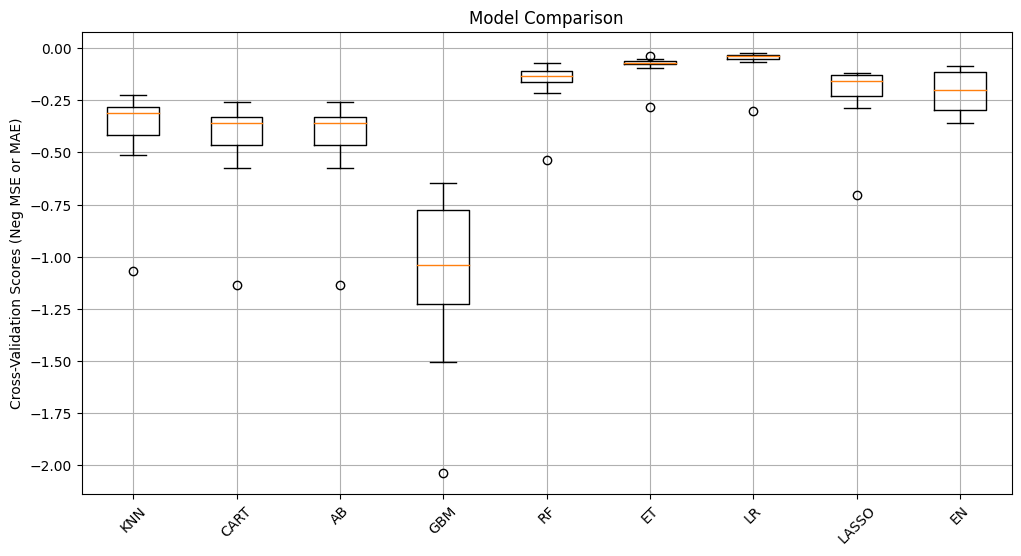

In [20]:
plt.figure(figsize=(12, 6))
plt.boxplot(all_results, labels=all_names, vert=True)
plt.title('Model Comparison')
plt.ylabel('Cross-Validation Scores (Neg MSE or MAE)')
plt.xticks(rotation=45)
plt.grid(True)


plt.show()

**Orange Line (Median)**: This represents the median score of the cross-validation results for each model.
**Box**: The box shows the interquartile range (IQR), which is the range between the 25th percentile (Q1) and 75th percentile (Q3) of the cross-validation scores.
**Whiskers**: These extend to the smallest and largest scores that are not outliers.
**Outliers (Dots)**: Points beyond the whiskers are considered outliers, indicating cross-validation results that deviate significantly from the rest.

# **NEURAL NETWORKS**

**MODEL 1**

In [21]:
model1 = Sequential([
    Dense(64, activation='relu',kernel_regularizer=l2(0.00001), input_shape=(xtrain.shape[1],)),
    Dropout(0.4),
   
    Dense(32, activation='relu',kernel_regularizer=l2(0.00001)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model1.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history = model1.fit(X_train_std, ytrain, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100


I0000 00:00:1734788285.158186      92 service.cc:145] XLA service 0x7dcf24007bf0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734788285.158234      92 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734788285.158238      92 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 116/1000 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4203 - mae: 0.3198

I0000 00:00:1734788287.760683      92 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.3694 - mae: 0.2077 - val_loss: 0.2719 - val_mae: 0.1161
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.5060 - mae: 0.1288 - val_loss: 0.2569 - val_mae: 0.0845
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3460 - mae: 0.1030 - val_loss: 0.2351 - val_mae: 0.0738
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2131 - mae: 0.0901 - val_loss: 0.2138 - val_mae: 0.0779
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2136 - mae: 0.0863 - val_loss: 0.2257 - val_mae: 0.0756
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1872 - mae: 0.0801 - val_loss: 0.2261 - val_mae: 0.0822
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1923 - mae: 0.0778 - val_loss: 0.1696 - val_mae: 0.0745
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2860 - mae: 0.0832 - val_loss: 0.1636 - val_mae: 0.0680
Epoch 9/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2

In [22]:
loss, mae = model1.evaluate(X_val_std, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0761 - mae: 0.0701
Test Loss: 0.1143
Test MAE: 0.0708


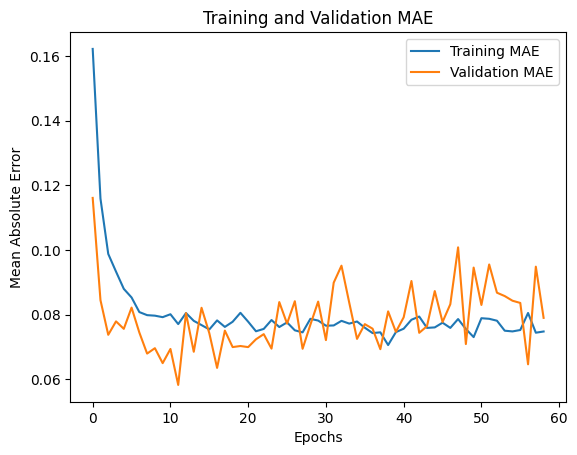

In [23]:
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

**MODEL 2**

In [24]:
model2 = Sequential([
    Dense(128, activation='relu',kernel_regularizer=l2(0.0001), input_shape=(xtrain.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu',kernel_regularizer=l2(0.0001)),
    Dropout(0.5),
    Dense(32, activation='relu',kernel_regularizer=l2(0.0001)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model2.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history1 = model2.fit(X_train_std, ytrain, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.4956 - mae: 0.1821 - val_loss: 0.3410 - val_mae: 0.0960
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2808 - mae: 0.1149 - val_loss: 0.2925 - val_mae: 0.0860
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3230 - mae: 0.1057 - val_loss: 0.2534 - val_mae: 0.0913
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3955 - mae: 0.1120 - val_loss: 0.2530 - val_mae: 0.0680
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2672 - mae: 0.0900 - val_loss: 0.2840 - val_mae: 0.0699
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3232 - mae: 0.0978 - val_loss: 0.2497 - val_mae: 0.0758
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4112 - mae: 0.0934 - val_loss: 0.2648 - val_mae: 0.0756
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2682 - mae: 0.0897 - val_loss: 0.2317 - val_mae: 0.0779
Epoch 9/100
1000/1000 ━━━━━━━━━━

In [25]:
loss, mae = model2.evaluate(X_val_std, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1374 - mae: 0.1136
Test Loss: 0.1622
Test MAE: 0.1137


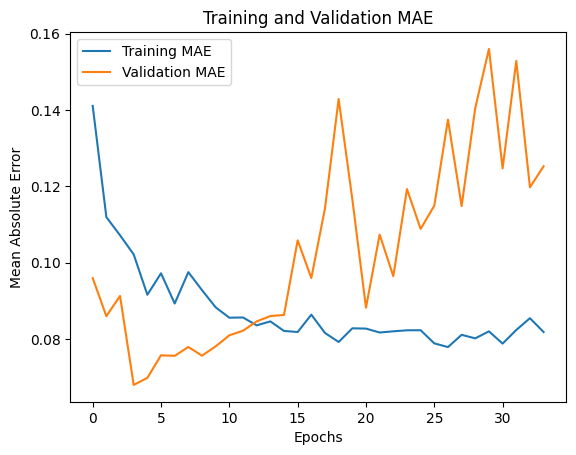

In [26]:
plt.plot(history1.history['mae'], label='Training MAE')
plt.plot(history1.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

**MODEL 3**

In [27]:
model3 = Sequential([
    Dense(64, activation='relu',kernel_regularizer=l2(0.001), input_shape=(xtrain.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu',kernel_regularizer=l2(0.001)),
    Dropout(0.3),
    Dense(32, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model3.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history2 = model3.fit(X_train_std, ytrain, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.8580 - mae: 0.2061 - val_loss: 0.3366 - val_mae: 0.0877
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3371 - mae: 0.1018 - val_loss: 0.3041 - val_mae: 0.0791
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4029 - mae: 0.1034 - val_loss: 0.2762 - val_mae: 0.0679
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2219 - mae: 0.0849 - val_loss: 0.2253 - val_mae: 0.0861
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2356 - mae: 0.0894 - val_loss: 0.2105 - val_mae: 0.0687
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3315 - mae: 0.0883 - val_loss: 0.2270 - val_mae: 0.0842
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3093 - mae: 0.0880 - val_loss: 0.2214 - val_mae: 0.0655
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.1895 - mae: 0.0768 - val_loss: 0.1790 - val_mae: 0.0683
Epoch 9/100
1000/1000 ━━━━━━━━━━

In [28]:
loss, mae = model3.evaluate(X_val_std, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1384 - mae: 0.0570
Test Loss: 0.1579
Test MAE: 0.0564


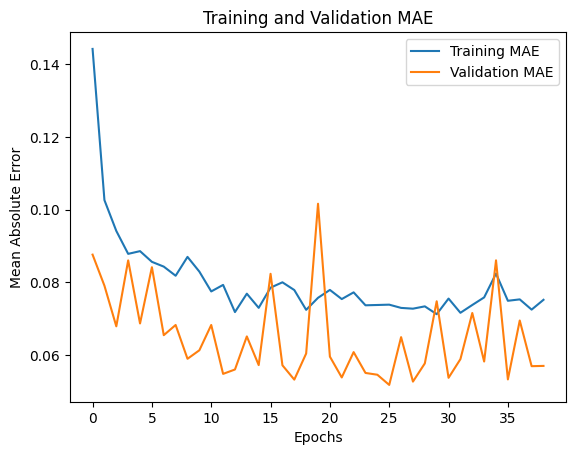

In [29]:
plt.plot(history2.history['mae'], label='Training MAE')
plt.plot(history2.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

**MODEL 4**

In [30]:
model4 = Sequential([
    Dense(64, activation='relu',kernel_regularizer=l2(0.001), input_shape=(xtrain.shape[1],)),
    Dropout(0.2),
   
    Dense(32, activation='relu',kernel_regularizer=l2(0.001)),
    Dense(1)
])

optimizer = Adam(learning_rate=0.001)
model4.compile(optimizer=optimizer, loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

history3 = model4.fit(X_train_std, ytrain, epochs=100, batch_size=32, 
                    validation_split=0.2, callbacks=[early_stop])

Epoch 1/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3153 - mae: 0.1741 - val_loss: 0.2927 - val_mae: 0.1105
Epoch 2/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3259 - mae: 0.1065 - val_loss: 0.2756 - val_mae: 0.0736
Epoch 3/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2276 - mae: 0.0820 - val_loss: 0.2444 - val_mae: 0.0709
Epoch 4/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.3381 - mae: 0.0882 - val_loss: 0.2363 - val_mae: 0.0702
Epoch 5/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2506 - mae: 0.0798 - val_loss: 0.2077 - val_mae: 0.0647
Epoch 6/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2781 - mae: 0.0821 - val_loss: 0.1926 - val_mae: 0.0719
Epoch 7/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2960 - mae: 0.0794 - val_loss: 0.1770 - val_mae: 0.0660
Epoch 8/100
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.2486 - mae: 0.0783 - val_loss: 0.1811 - val_mae: 0.0597
Epoch 9/100
1000/1000 ━━━━━━━━━━

In [31]:
loss, mae = model4.evaluate(X_val_std, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1009 - mae: 0.0463
Test Loss: 0.1220
Test MAE: 0.0462


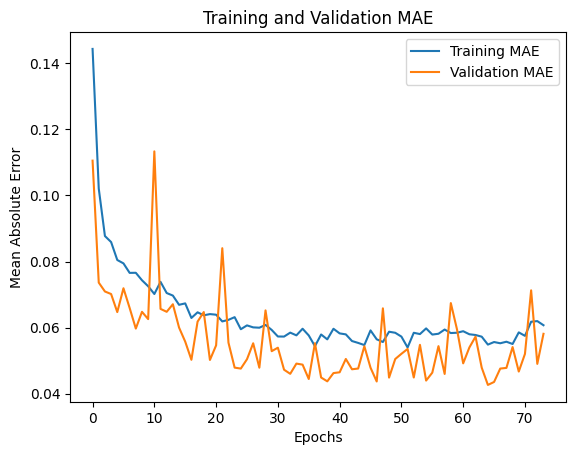

In [32]:
plt.plot(history3.history['mae'], label='Training MAE')
plt.plot(history3.history['val_mae'], label='Validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.title('Training and Validation MAE')
plt.show()

In [33]:
print('MODEL 1')
loss, mae = model1.evaluate(X_val_std, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')
print('-------------------------------------------------------------------------------------------------------------')
print('MODEL 2')
loss, mae = model2.evaluate(X_val_std, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')
print('-------------------------------------------------------------------------------------------------------------')
print('MODEL 3')
loss, mae = model3.evaluate(X_val_std, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')
print('-------------------------------------------------------------------------------------------------------------')
print('MODEL 4')
loss, mae = model4.evaluate(X_val_std, yval)
print(f'Test Loss: {loss:.4f}')
print(f'Test MAE: {mae:.4f}')

MODEL 1
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0761 - mae: 0.0701
Test Loss: 0.1143
Test MAE: 0.0708
-------------------------------------------------------------------------------------------------------------
MODEL 2
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1374 - mae: 0.1136
Test Loss: 0.1622
Test MAE: 0.1137
-------------------------------------------------------------------------------------------------------------
MODEL 3
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1384 - mae: 0.0570
Test Loss: 0.1579
Test MAE: 0.0564
-------------------------------------------------------------------------------------------------------------
MODEL 4
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1009 - mae: 0.0463
Test Loss: 0.1220
Test MAE: 0.0462


**MODEL 1** performs best amongst the 4 models.

# FINE TUNING ALGORITHMS AND ENSEMBLE METHODS

**Grid Search Parameter Tuning**  is an approach to parameter tuning that will methodically build and evaluate a
 model for each combination of algorithm parameters specified in a grid.

**K Neighbors Regressor**

In [34]:
 k_values = np.array([1,3,5,7,9,11,13,15,17,19,21])
 param_grid = dict(n_neighbors=k_values)
 model = KNeighborsRegressor()
 kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
 grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
 grid_result = grid.fit(X_train_std, ytrain)

 print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 means = grid_result.cv_results_['mean_test_score']
 stds = grid_result.cv_results_['std_test_score']
 params = grid_result.cv_results_['params']
 for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.224254 using {'n_neighbors': 5}
-0.298723 (0.150977) with: {'n_neighbors': 1}
-0.235894 (0.183749) with: {'n_neighbors': 3}
-0.224254 (0.168284) with: {'n_neighbors': 5}
-0.225703 (0.160647) with: {'n_neighbors': 7}
-0.225800 (0.167675) with: {'n_neighbors': 9}
-0.226143 (0.164099) with: {'n_neighbors': 11}
-0.228800 (0.167526) with: {'n_neighbors': 13}
-0.232795 (0.174771) with: {'n_neighbors': 15}
-0.234213 (0.178602) with: {'n_neighbors': 17}
-0.237737 (0.182935) with: {'n_neighbors': 19}
-0.239267 (0.186260) with: {'n_neighbors': 21}


**Random Forest Regressor**

In [35]:
 param_grid = dict(n_estimators=np.array([10,20,30,40,50,60,70,80,90,100]))
 model = RandomForestRegressor(random_state=seed)
 kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
 grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
 grid_result = grid.fit(X_train_std, ytrain)

 print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 means = grid_result.cv_results_['mean_test_score']
 stds = grid_result.cv_results_['std_test_score']
 params = grid_result.cv_results_['params']
 for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.089732 using {'n_estimators': 70}
-0.098954 (0.074875) with: {'n_estimators': 10}
-0.093670 (0.076165) with: {'n_estimators': 20}
-0.090999 (0.077704) with: {'n_estimators': 30}
-0.091882 (0.080648) with: {'n_estimators': 40}
-0.091156 (0.080298) with: {'n_estimators': 50}
-0.089979 (0.082642) with: {'n_estimators': 60}
-0.089732 (0.081057) with: {'n_estimators': 70}
-0.091137 (0.084533) with: {'n_estimators': 80}
-0.090715 (0.085584) with: {'n_estimators': 90}
-0.089817 (0.085328) with: {'n_estimators': 100}


**Extra trees Regressor**

In [36]:
 param_grid = dict(n_estimators=np.array([10,20,30,40,50,60,70,80,90,100]))
 model = ExtraTreesRegressor(random_state=seed)
 kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
 grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
 grid_result = grid.fit(X_train_std, ytrain)

 print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
 means = grid_result.cv_results_['mean_test_score']
 stds = grid_result.cv_results_['std_test_score']
 params = grid_result.cv_results_['params']
 for mean, stdev, param in zip(means, stds, params):
  print("%f (%f) with: %r" % (mean, stdev, param))

Best: -0.050514 using {'n_estimators': 100}
-0.066360 (0.064337) with: {'n_estimators': 10}
-0.054788 (0.068272) with: {'n_estimators': 20}
-0.051284 (0.072088) with: {'n_estimators': 30}
-0.051252 (0.075165) with: {'n_estimators': 40}
-0.051128 (0.076631) with: {'n_estimators': 50}
-0.051675 (0.078128) with: {'n_estimators': 60}
-0.051917 (0.078276) with: {'n_estimators': 70}
-0.051818 (0.081393) with: {'n_estimators': 80}
-0.051445 (0.081109) with: {'n_estimators': 90}
-0.050514 (0.080347) with: {'n_estimators': 100}


**TEST WITH THE VALIDATION SET**

In [37]:
 model = RandomForestRegressor(random_state=seed, n_estimators=70)
 model.fit(X_train_std, ytrain)
 predictions = model.predict(X_val_std)
 print(mean_squared_error(yval, predictions))

0.08939088692727644


In [42]:
 model = ExtraTreesRegressor(random_state=seed, n_estimators=100)
 model.fit(X_train_std, ytrain)
 predictions = model.predict(X_val_std)
 print(mean_squared_error(yval, predictions))

0.0430711852543865


In [39]:
for name, model in models_linear:
    model.fit(X_train_std, ytrain)
    predictions = model.predict(X_val_std)
    mse = mean_squared_error(yval, predictions)
    mae = mean_absolute_error(yval, predictions)
    print(f"{name:<10}{mse:<20.4f}{mae:<20.4f}")

LR        0.4026              0.1843              
LASSO     0.4450              0.1689              
EN        0.4450              0.1689              


In [40]:
for name, model in models_nonlinear:
    model.fit(X_train_std, ytrain)
    predictions = model.predict(X_val_std)
    mse = mean_squared_error(yval, predictions)
    mae = mean_absolute_error(yval, predictions)
    print(f"{name:<10}{mse:<20.4f}{mae:<20.4f}")

KNN       0.2824              0.0596              
CART      0.1697              0.0576              


*Here K-neighbors regressor is before performing Parameter Tuning*

In [41]:
for name, model in ensembles:
    model.fit(X_train_std, ytrain)
    predictions = model.predict(X_val_std)
    mse = mean_squared_error(yval, predictions)
    mae = mean_absolute_error(yval, predictions)
    print(f"{name:<10}{mse:<20.4f}{mae:<20.4f}")

AB        0.8344              0.7607              
GBM       0.1548              0.0875              
RF        0.1581              0.0412              
ET        0.0473              0.0295              


*Here Random Forest Regressor and Extra Trees Regressor is before performing Parameter Tuning*

# CONCLUSION

**Extra Trees Regressor** performed the best followed by **Random Forest Regressor**. Both outperformed **Neural Network**.
Hence we choose ***Extra Trees Regressor*** as the model to be used. However **Extra Tree Regressor** didn't perform better after Standardization , whereas **Random Forest Regressor** and **Neural Network** performed better. **K-Neighbors Regressor** also saw a major improvement.